DOWNLOADING OF DATA , LINK IS [link](https://www.kaggle.com/datasets/cicdataset/cicids2017?resource=download)

## Pre Processing

####  The purpose of this program is to clear the csv files containing CICIDS2017 data from errors.
####  the faults observed are:
####      1-   288602 of the entries in the file "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv" are empty / meaningless.
####                   (e.g. ",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,")
####
####      2-  In the original csv files, while describing the Web Attack types such as Brute Force, XSS, Sql Injection, the character used is not recognized
####                    by the Python-Pandas library and leads to the error.
####                   this character ("–", Unicode code:8211) has been changed with another character ("-", Unicode code:45) to correct the error.
####
####   After the error correction, all the csv files were made into a single file (all_date.csv) to make it easier to process.


In [1]:
# IMPORTS OF MODULES
import pandas as pd
import os
from sklearn import preprocessing
import time
seconds = time.time()
%matplotlib inline

In [2]:
print("This process may take 5 to 10 minutes, depending on the performance of your computer.\n\n\n")
number="0123456789"
# CSV files names:
csv_files=os.listdir('./DATA/') ## ALL DATA SHOULD BE UNDER THE FOLDER IN SAME DIRECTORY NAMED "DATA"

# HEADERS OF LABELS OF DATAFRAME
df = pd.read_csv('./DATA/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
main_labels = [x.strip() for x in df.columns.to_list()]

main_labels2=main_labels
main_labels=( ",".join( i for i in main_labels ) )
main_labels=main_labels+"\n"
main_labels
flag=True

for i in range(len(csv_files)):
    print('FILENAME :',str(csv_files[i]))
    ths = open(str(csv_files[i]), "w")
    ths.write(main_labels)
    with open("./DATA/"+csv_files[i], "r") as file:
        print('REMOVING THE inf,NaN and other errors')
        while True:
            try:
                line=file.readline()
                if  line[0] in number:# this line eliminates the headers of CSV files and incomplete streams .
                    if " – " in str(line): ##  if there is "–" character ("–", Unicode code:8211) in the flow ,  it will be chanced with "-" character ( Unicode code:45).
                        line=(str(line).replace(" – "," - "))
                    line=(str(line).replace("inf","0"))
                    line=(str(line).replace("Infinity","0"))
                    line=(str(line).replace("NaN","0"))
                    ths.write(str(line))
                else:
                    continue                       
            except:
                break
    ths.close()
 
    df=pd.read_csv(str(csv_files[i]),low_memory=False)
    df=df.fillna(0)
    
    string_features=["Flow Bytes/s","Flow Packets/s"]
    for ii in string_features: #Some data in the "Flow Bytes / s" and "Flow Packets / s" columns are not numeric. Fixing this bug in this loop
        df[ii]=df[ii].replace('Infinity', -1)
        df[ii]=df[ii].replace('NaN', 0)
        number_or_not=[]
        for iii in df[ii]:
            try:
                k=int(float(iii))
                number_or_not.append(int(k))
            except:
                number_or_not.append(iii)
        df[ii]=number_or_not



    string_features=[]
    for j in main_labels2: # In this section, non-numeric (string and / or categorical) properties (columns) are detected.
        if df[j].dtype=="object":
            string_features.append(j)
    try:
        string_features.remove('Label')#The "Label" property was removed from the list. Because it has to remain "categorical" for using with different machine learning approach.
    except:
        print("error!")
    labelencoder_X = preprocessing.LabelEncoder()


    print('LABEL ENCODING')
    for ii in string_features: ## In this loop, non-numeric (string and/or categorical) properties converted to numeric features.
        try:
            df[ii]=labelencoder_X.fit_transform(df[ii])
        except:
            df[ii]=df[ii].replace('Infinity', -1)
    df=df.drop(main_labels2[61], axis=1) ## Column 61 is deleted because it is unnecessary, column 41 ("Fwd Header Length" feature) had be mistakenly rewritten.


    print('MERGING INTO ONE FILE')
    ##All CSV files are merged into a single file.
    if flag:
        df.to_csv('all_data.csv' ,index = False)
        flag=False
    else:
        df.to_csv('all_data.csv' ,index = False,header=False,mode="a")
    #os.remove(str(csv_files[i]))
    print("The pre-processing phase of the ",csv_files[i]," file is completed.\n")
    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

This process may take 5 to 10 minutes, depending on the performance of your computer.



FILENAME : Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
REMOVING THE inf,NaN and other errors
LABEL ENCODING
MERGING INTO ONE FILE
The pre-processing phase of the  Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  file is completed.

FILENAME : Monday-WorkingHours.pcap_ISCX.csv
REMOVING THE inf,NaN and other errors
LABEL ENCODING
MERGING INTO ONE FILE
The pre-processing phase of the  Monday-WorkingHours.pcap_ISCX.csv  file is completed.

FILENAME : Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
REMOVING THE inf,NaN and other errors
LABEL ENCODING
MERGING INTO ONE FILE
The pre-processing phase of the  Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  file is completed.

FILENAME : Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
REMOVING THE inf,NaN and other errors
LABEL ENCODING
MERGING INTO ONE FILE
The pre-processing phase of the  Thursday-WorkingHours-Morning-W

## STATISTICS OF THE DATA

###### The data will not be equally divided into labels which can make the model learn wrong as it always give more weight to BENIGN. To avoid that we will reduce the data

##### Also the data is too big to be used in this processor. So we will go for reduction of data option .  :-)
### Lets see the actual data.

In [3]:
'''
  all_data.csv files is required for the operation of the program.
  all_data.csv file must be located in the same directory as the program.

  The purpose of this program is to provide statistics about the data contained in the dataset.
  Considering that some of the data are very large and some of them are very small, 
  the graphics are created in three separate groups, so that all data can be seen:
        big: labels with more than 11000 numbers
        medium: labels with numbers between 600 and 11000
        small: labels with fewer than 600 numbers
'''


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import time
seconds = time.time()

#  graph creation function
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()

In [4]:
## TIME TAKING CELL :(
df=pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64


There are total attacks : 557646 out of total data of 2830743
BENIGN %80.0
ATTACK %20.0


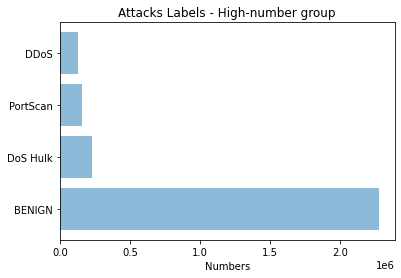

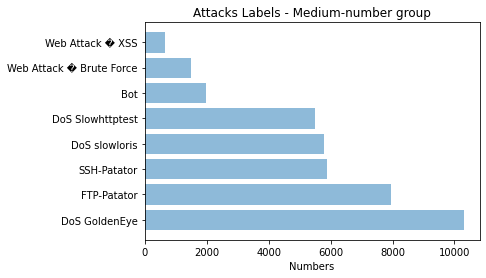

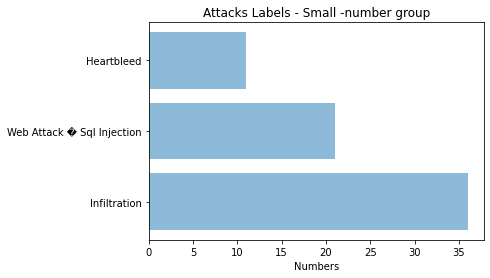

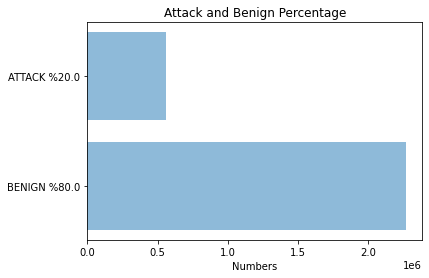

mission accomplished!
Total operation time: =  12.404284477233887 seconds


In [5]:
## WHOLE DATA IS FAVOURING THE BENIGN label... 
key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attack=0
benign=0

## the attacks are grouped under 3 groups,
## so that all values can be seen on the graph.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i]) 
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attack+=values[i]
        
key =[benign,attack]

print('There are total attacks :',attack,'out of total data of',attack+benign)

#functions are called to create a chartes
labels=["BENIGN %"+str(round(benign/(benign+attack),2)*100),
        "ATTACK %"+str(round(attack/(benign+attack),2)*100)]
print(labels[0])
print(labels[1])
graph(big_labels,big_values,"Numbers","Attacks Labels - High-number group")
graph(medium_labels,medium_values,"Numbers","Attacks Labels - Medium-number group")
graph(small_labels,small_values,"Numbers","Attacks Labels - Small -number group")
graph(labels,key,"Numbers","Attack and Benign Percentage")



print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

## Data Reduction (balanced data formation)

In [1]:
'''
        The purpose of this program is to produce CSV files consisting of only one type of attack and benign flow.
        These files contain all attack flow and some benign data flow. The rate : (attack= 30% , benign=70%) 
        normal data streams are randomly selected
'''
import random
import os
import pandas as pd
import time
%matplotlib inline

def folder(f_name): 
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [2]:
# HEADERS OF LABELS OF DATAFRAME
df = pd.read_csv('./DATA/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
main_labels = [x.strip() for x in df.columns.to_list()]
main_labels=( ",".join( i for i in main_labels ) )

In [3]:
main_labels

'Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk R

In [4]:
df=pd.read_csv('all_data.csv', usecols=["Label"]) ## use columns is used so that we dont load huge data into ram :)
attacks = df['Label'].unique().tolist()
folder('./attacks/')

In [5]:
dict_attack = df.Label.value_counts().to_dict()
dict_attack

{'BENIGN': 2273097,
 'DoS Hulk': 231073,
 'PortScan': 158930,
 'DDoS': 128027,
 'DoS GoldenEye': 10293,
 'FTP-Patator': 7938,
 'SSH-Patator': 5897,
 'DoS slowloris': 5796,
 'DoS Slowhttptest': 5499,
 'Bot': 1966,
 'Web Attack � Brute Force': 1507,
 'Web Attack � XSS': 652,
 'Infiltration': 36,
 'Web Attack � Sql Injection': 21,
 'Heartbleed': 11}

In [6]:
webs = []
for i in dict_attack:
    if i[0] == 'W':
        webs.append(i)

In [7]:
webs ##web attack files name

['Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection']

In [8]:
print("This process may take 3 to 8 minutes, depending on the performance of your computer.\n\n\n")
seconds = time.time()

for i in dict_attack:
    print(i)
    if i == 'BENIGN':
        print('skipped')
        continue ## to skip the benign part....
    # in this section, a file is opened for each attack type and is recorded at a random benign flow.
    a,b=0,0
    ths = open("./attacks/"+i + ".csv", "w")
    ths.write(str(main_labels)+"\n")
    benign_num=int(dict_attack['BENIGN']/(dict_attack[i]*(7/3)))
    with open("all_data.csv", "r") as file:
        file.readline() ## to skip the first line of columns names
        while True:
            line=file.readline().strip()
            if line == "":
                break
            if line[-1] == '\n':
                print(':=)' , end=' ')
                line=line[:-1]
            k=line.split(",")
            if k[-1]=="BENIGN":
                rnd=random.randint(1,benign_num)
                if rnd==1:
                    ths.write(str(line)+"\n")
                    b+=1
            elif  k[-1]==i:
                ths.write(str(line)+"\n")
                a+=1
                #print(k[-1],end=' ')
            else:
                #print(k[-1],end=' ')
                continue
    print('done')
    ths.close()
    
    print(i ,"file is completed\n attack:%d\n benign:%d\n\n\n " %(a,b))
##All web attack files are merged into a single file.
print('COMBINING WEB ATTACKS :=) ')
flag=True
for i in webs:
    df=pd.read_csv("./attacks/"+str(i)+".csv")
    if flag:
        df.to_csv('./attacks/Web Attack.csv' ,index = False)
        flag=False
    else:
        df.to_csv('./attacks/Web Attack.csv' ,index = False,header=False,mode="a")
    os.remove("./attacks/"+str(i)+".csv")

print("mission accomplished!")
print("operation time: = ",time.time()- seconds ,"seconds")

This process may take 3 to 8 minutes, depending on the performance of your computer.



BENIGN
skipped
DoS Hulk
done
DoS Hulk file is completed
 attack:231073
 benign:567788


 
PortScan
done
PortScan file is completed
 attack:158930
 benign:378956


 
DDoS
done
DDoS file is completed
 attack:128027
 benign:325432


 
DoS GoldenEye
done
DoS GoldenEye file is completed
 attack:10293
 benign:23925


 
FTP-Patator
done
FTP-Patator file is completed
 attack:7938
 benign:18498


 
SSH-Patator
done
SSH-Patator file is completed
 attack:5897
 benign:13701


 
DoS slowloris
done
DoS slowloris file is completed
 attack:5796
 benign:13620


 
DoS Slowhttptest
done
DoS Slowhttptest file is completed
 attack:5499
 benign:12971


 
Bot
done
Bot file is completed
 attack:1966
 benign:4620


 
Web Attack � Brute Force
done
Web Attack � Brute Force file is completed
 attack:1507
 benign:3473


 
Web Attack � XSS
done
Web Attack � XSS file is completed
 attack:652
 benign:1505


 
Infiltration
done
Inf

### Feature Selection (if required)

In [1]:
'''
    the purpose of this code is to determine which features to use in the machine learning phase.
    for this purpose, the importance weights of the attacks are calculated.
    this calculation was made using sklearn-RandomForestRegressor.
'''
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time

## important functions
def folder(f_name): #this function creates a folder named "feaure_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        
# CSV files names:
csv_files=os.listdir("attacks")# It creates a list of file names in the "attacks" folder.

# HEADERS OF LABELS OF DATAFRAME
df = pd.read_csv('./DATA/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
main_labels = [x.strip() for x in df.columns.to_list()]

In [3]:
seconds = time.time()
ths = open("importance_list_for_attack_files.csv", "w")
folder("./feaure_pics/")
for j in csv_files:
    print('**'+j+'**')
    df=pd.read_csv("./attacks/"+j)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        print(i)
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
    
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
   

    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()

**SSH-Patator.csv**
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


ValueError: could not convert string to float: 'BENIGN'

## Since all the important labels for different attacks are different, we will use combined of them and all of them for our model

In [7]:
csv_files=os.listdir("attacks")# It creates a list of file names in the "attacks" folder.
csv_files

['SSH-Patator.csv',
 'Heartbleed.csv',
 'DoS GoldenEye.csv',
 'Web Attack.csv',
 'Infiltration.csv',
 'FTP-Patator.csv',
 'DoS Hulk.csv',
 'PortScan.csv',
 'DoS Slowhttptest.csv',
 'DDoS.csv',
 'DoS slowloris.csv',
 'Bot.csv']

In [8]:
df = pd.read_csv('./attacks/Bot.csv')

In [9]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,61035701,15,12,958,997,674,0,63.866667,179.280653,...,119036.5,86187.07571,294965,83657,10000000.0,27593.53713,10000000,9960005,BENIGN,NaN
1,53,31208,2,2,72,128,36,36,36.000000,0.000000,...,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN,NaN
2,53,93321,2,2,60,192,30,30,30.000000,0.000000,...,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN,NaN
3,80,198150,3,0,0,0,0,0,0.000000,0.000000,...,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN,NaN
4,443,70167458,62,93,4399,69687,608,0,70.951613,130.595286,...,11300000.0,0.00000,11300000,11300000,58800000.0,0.00000,58800000,58800000,BENIGN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6581,443,8999564,3,0,0,0,0,0,0.000000,0.000000,...,3000112.0,0.00000,3000112,3000112,5999452.0,0.00000,5999452,5999452,BENIGN,NaN
6582,53,469030,2,2,62,140,31,31,31.000000,0.000000,...,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN,NaN
6583,53,230,2,2,72,334,36,36,36.000000,0.000000,...,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN,NaN
6584,53,247,2,2,70,166,35,35,35.000000,0.000000,...,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN,NaN


In [11]:
f = '53,61897,1,1,46,103,46,46,46.0,0.0,103,103,103.0,0.0,2407,32,61897.0,0.0,61897,61897,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,20,16.15587185,16.15587185,46,103,65.0,32.90896534,1083.0,0,0,0,0,0,0,0,0,1,97.5,46.0,103.0,32,0,0,0,0,0,1,46,1,103,-1,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN'
len(f.split(','))

78

In [15]:
# HEADERS OF LABELS OF DATAFRAME
df = pd.read_csv('./DATA/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
main_labels = [x.strip() for x in df.columns.to_list()]
main_labels=( ",".join( i for i in main_labels ) )

len(main_labels.split(','))

79